In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read in CSV Files from 2014-2018 ##
# Read CSV File 2018
fantasy_stats_2018 = pd.read_csv('Data/Fantasy_Stats_2018-19.csv', 
                                 header=1, index_col='Rk')
fantasy_stats_2018 = fantasy_stats_2018.rename(columns={'VBD▼': 'VBD'})
fantasy_stats_2018['Year'] = '2018'
pd.options.display.max_columns = None
#display(fantasy_stats_2018)

# Read CSV File 2017
fantasy_stats_2017 = pd.read_csv('Data/Fantasy_Stats_2017-18.csv', 
                                 header=1, index_col='Rk')
pd.options.display.max_columns = None
fantasy_stats_2017['Year'] = '2017'
#display(fantasy_stats_2017)

# Read CSV File 2016
fantasy_stats_2016 = pd.read_csv('Data/Fantasy_Stats_2016-17.csv', 
                                 header=1, index_col='Rk')
pd.options.display.max_columns = None
fantasy_stats_2016['Year'] = '2016'
#display(fantasy_stats_2016)

# Read CSV File 2015
fantasy_stats_2015 = pd.read_csv('Data/Fantasy_Stats_2015-16.csv', 
                                 header=1, index_col='Rk')
pd.options.display.max_columns = None
fantasy_stats_2015['Year'] = '2015'
#display(fantasy_stats_2015)

# Read CSV File 2014
fantasy_stats_2014 = pd.read_csv('Data/Fantasy_Stats_2014-15.csv',
                                 header=1, index_col='Rk')
pd.options.display.max_columns = None
fantasy_stats_2014['Year'] = '2014'
#display(fantasy_stats_2014)

In [3]:
## Quarterbacks ##
#
# 2018 Quarterbacks
qb_2018 = fantasy_stats_2018[fantasy_stats_2018['FantPos'] == 'QB'].head(37)
#qb_2018 = pd.DataFrame(qb_2018[:37])

# 2017 Quarterbacks
qb_2017 = fantasy_stats_2017[fantasy_stats_2017['FantPos'] == 'QB']
qb_2017 = pd.DataFrame(qb_2017[:37])
#display(qb_2017[:10])

# 2016 Quarterbacks
qb_2016 = fantasy_stats_2016[fantasy_stats_2016['FantPos'] == 'QB']
qb_2016 = pd.DataFrame(qb_2016[:37])
#display(qb_2016[:10])

# 2015 Quarterbacks
qb_2015 = fantasy_stats_2015[fantasy_stats_2015['FantPos'] == 'QB']
qb_2015 = pd.DataFrame(qb_2015[:37])
#display(qb_2015[:10])

# 2014 Quarterbacks
qb_2014 = fantasy_stats_2014[fantasy_stats_2014['FantPos'] == 'QB']
qb_2014 = pd.DataFrame(qb_2014[:37])
#display(qb_2014[:10])

# Combine QBs
qb = qb_2018.merge(qb_2017, how='outer', on=None)
qb = qb.merge(qb_2016, how='outer', on=None)
qb = qb.merge(qb_2015, how='outer', on=None)
qb = qb.merge(qb_2014, how='outer', on=None)

# Removing special characters from player names
qb = pd.DataFrame(qb)
qb['Player'] = qb['Player'].str.strip('*+')

# Change NaN Values to 0
qb = qb.fillna(0)

In [4]:
# Store Quarterback DataFrame
# To be retrieved in Regression Analysis Notebook
%store qb

Stored 'qb' (DataFrame)


---------Quarterback Correlation---------


,FantPt,Cmp,Att,Yds,TD,Tgt,Att.1,Yds.1,TD.1,Fmb,FL,Int,TD.3
FantPt,1.0,0.834737,0.817666,0.900263,0.928808,0.075801,0.496426,0.304283,0.311959,0.427022,0.333404,0.291868,0.305756


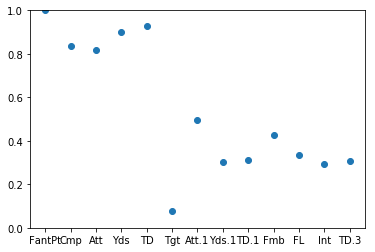

In [5]:
# QB Correlation
print('---------Quarterback Correlation---------')

qb_corr = qb[['FantPt','Cmp','Att','Yds','TD', 
              'Tgt','Att.1','Yds.1','TD.1','Fmb', 
              'FL', 'Int', 'TD.3']].corr(method='spearman', min_periods=185)

display(qb_corr[:1])
plt.plot('FantPt', data=qb_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()

---------Quarterback to Touchdown Correlation---------


,TD,Age,GS,Cmp,Att,Yds,Int,Att.1,Yds.1,TD.1
TD,1.0,0.263282,0.804183,0.833636,0.816332,0.89592,0.362045,0.291407,0.101323,0.065803


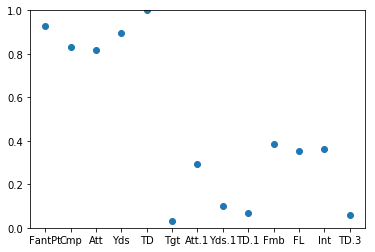

In [6]:
# Quarterback to Touchdown Correlation
print('---------Quarterback to Touchdown Correlation---------')

td_corr = qb[['TD','Tm','Age','GS','Cmp', 
              'Att','Yds','Int','Att.1','Yds.1', 
              'TD.1']].corr(method='spearman',min_periods=185)

display(td_corr[:1])
plt.plot('TD', data=qb_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()

In [7]:
# Quarterback Sorted
print('---------Quarterback Sorted---------')

qb_sorted = qb.sort_values(by=['TD','Yds','Cmp','Att','Att.1',
                               'TD.1'],na_position='last',ascending=False)
display(qb_sorted[:5])

---------Quarterback Sorted---------


,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,Patrick Mahomes,KAN,QB,23,16,16,383,580,5097,50,12,60,272,4.53,2,0,0,0,0.0,0,9,2,2,1.0,0.0,417.0,417.1,437.1,429.1,134.0,1,5.0,2018
149,Andrew Luck,IND,QB,25,16,16,380,616,4761,40,16,64,273,4.27,3,0,0,0,0.0,0,13,6,3,0.0,0.0,356.0,351.7,379.7,367.7,90.0,2,14.0,2014
74,Aaron Rodgers,GNB,QB,33,16,16,401,610,4428,40,7,67,369,5.51,4,0,0,0,0.0,0,8,4,4,1.0,1.0,382.0,380.0,397.0,387.0,114.0,1,4.0,2016
151,Peyton Manning,DEN,QB,38,16,16,395,597,4727,39,15,24,-24,-1.00,0,0,0,0,0.0,0,6,2,0,0.0,2.0,313.0,312.7,332.7,327.7,47.0,4,32.0,2014
4,Andrew Luck,IND,QB,29,16,16,430,639,4593,39,15,46,148,3.22,0,2,1,4,4.0,0,6,1,0,0.0,2.0,327.0,327.9,349.9,342.4,44.0,5,38.0,2018


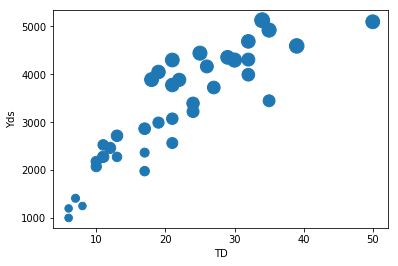

In [8]:
def plotyear(year):
    data = qb[qb.Year == year]
    area = data.Att * 0.33
    data.plot.scatter('TD', 'Yds', s=area)
    
plotyear('2018')

In [9]:
## Running Backs ##
#
# 
# 2018 Running Backs
rb_2018 = fantasy_stats_2018[fantasy_stats_2018['FantPos'] == 'RB']
rb_2018 = rb_2018[:73]

# 2017 Running Backs
rb_2017 = fantasy_stats_2017[fantasy_stats_2017['FantPos'] == 'RB']
rb_2017 = pd.DataFrame(rb_2017[:73])
#display(rb_2017[:10])

# 2016 Running Backs
rb_2016 = fantasy_stats_2016[fantasy_stats_2016['FantPos'] == 'RB']
rb_2016 = pd.DataFrame(rb_2016[:73])
#display(rb_2016[:10])

# 2015 Running Backs
rb_2015 = fantasy_stats_2015[fantasy_stats_2015['FantPos'] == 'RB']
rb_2015 = pd.DataFrame(rb_2015[:73])
#display(rb_2015[:10])

# 2014 Running Backs
rb_2014 = fantasy_stats_2014[fantasy_stats_2014['FantPos'] == 'RB']
rb_2014 = pd.DataFrame(rb_2014[:73])
#display(rb_2014[:10])

# Combine RBs
rb = rb_2018.merge(rb_2017, how='outer', on=None)
rb = rb.merge(rb_2016, how='outer', on=None)
rb = rb.merge(rb_2015, how='outer', on=None)
rb = rb.merge(rb_2014, how='outer', on=None)

# Removing special characters from player names
rb = pd.DataFrame(rb)
rb['Player'] = rb['Player'].str.strip('*+')

# Change NaN Values to 0
rb = rb.fillna(0)

In [10]:
%store rb

Stored 'rb' (DataFrame)


-----RB Correlation------


,PPR,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3
PPR,1.0,0.747687,0.773852,0.20881,0.65545,0.688557,0.692509,0.663845,0.095662,0.424127,0.391269,0.286833,0.788136


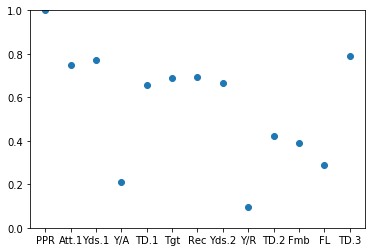

In [11]:
# Running Back Correlation
rb_corr = rb[['PPR','Att.1','Yds.1','Y/A','TD.1',
              'Tgt','Rec','Yds.2','Y/R','TD.2','Fmb',
              'FL','TD.3']].corr(method='spearman',min_periods=365)

print('-----RB Correlation------')
display(rb_corr[:1])
plt.plot('PPR', data=rb_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()

In [12]:
# Running Backs Sorted
print('--------RB Sorted---------')
rb_sorted = rb.sort_values(by=['TD.3','Yds.1','Att.1','Rec','Tgt','Yds.2',
                               'TD.1'],na_position='last',ascending=False)
display(rb_sorted[:10])

--------RB Sorted---------


,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,Todd Gurley,LAR,RB,24,14,14,0,0,0,0,0,256,1251,4.89,17,81,59,580,9.83,4,1,1,21,3.0,0.0,313.0,372.1,379.1,342.6,178.0,1,1.0,2018
146,David Johnson,ARI,RB,25,16,16,0,0,0,0,0,293,1239,4.23,16,120,80,879,10.99,4,5,3,20,1.0,0.0,328.0,407.8,416.8,367.8,196.0,1,1.0,2016
73,Todd Gurley,LAR,RB,23,15,15,0,0,0,0,0,279,1305,4.68,13,87,64,788,12.31,6,5,2,19,0.0,0.0,319.0,383.3,391.3,351.3,192.0,1,1.0,2017
152,LeGarrette Blount,NWE,RB,30,16,8,0,0,0,0,0,299,1161,3.88,18,8,7,38,5.43,0,2,1,18,0.0,0.0,226.0,232.9,236.9,229.4,94.0,7,8.0,2016
3,Alvin Kamara,NOR,RB,23,15,13,0,0,0,0,0,194,883,4.55,14,105,81,709,8.75,4,1,0,18,3.0,0.0,273.0,354.2,360.2,313.7,138.0,4,4.0,2018
294,Marshawn Lynch,SEA,RB,28,16,14,0,0,0,0,0,280,1306,4.66,13,48,37,367,9.92,4,4,2,17,0.0,0.0,265.0,302.3,310.3,283.8,146.0,3,3.0,2014
147,Ezekiel Elliott,DAL,RB,21,15,15,0,0,0,0,0,322,1631,5.07,15,39,32,363,11.34,1,5,1,16,0.0,0.0,293.0,325.4,332.4,309.4,162.0,2,2.0,2016
1,Saquon Barkley,NYG,RB,21,16,16,0,0,0,0,0,261,1307,5.01,11,121,91,721,7.92,4,0,0,15,1.0,0.0,295.0,385.8,391.8,340.3,159.0,2,2.0,2018
148,LeSean McCoy,BUF,RB,28,15,15,0,0,0,0,0,234,1267,5.41,13,57,50,356,7.12,1,3,0,14,1.0,0.0,248.0,298.3,304.3,273.3,117.0,3,3.0,2016
219,Devonta Freeman,ATL,RB,23,15,13,0,0,0,0,0,265,1056,3.98,11,97,73,578,7.92,3,3,2,14,0.0,0.0,243.0,316.4,324.4,279.9,120.0,1,2.0,2015


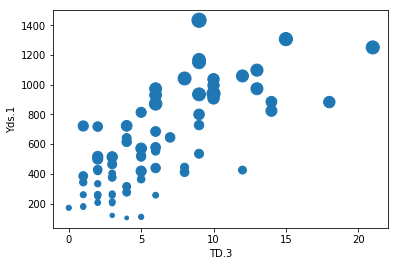

In [13]:
def plotyear(year):
    data = rb[rb.Year == year]
    area = data['Att.1'] * 0.67
    data.plot.scatter('TD.3', 'Yds.1', s=area)
    
plotyear('2018')

In [14]:
## Wide Receivers ##
#
# 
# 2018 Wide Receivers
wr_2018 = fantasy_stats_2018[fantasy_stats_2018['FantPos'] == 'WR']
wr_2018 = wr_2018[:91]
#display(wr_2018[:10])

# 2017 Wide Receivers
wr_2017 = fantasy_stats_2017[fantasy_stats_2017['FantPos'] == 'WR']
wr_2017 = pd.DataFrame(wr_2017[:91])
#display(rb_2017[:10])

# 2016 Wide Receivers
wr_2016 = fantasy_stats_2016[fantasy_stats_2016['FantPos'] == 'WR']
wr_2016 = pd.DataFrame(wr_2016[:91])
#display(wr_2016[:10])

# 2015 Wide Receivers
wr_2015 = fantasy_stats_2015[fantasy_stats_2015['FantPos'] == 'WR']
wr_2015 = pd.DataFrame(wr_2015[:91])
#display(wr_2015[:10])

# 2014 Wide Receivers
wr_2014 = fantasy_stats_2014[fantasy_stats_2014['FantPos'] == 'WR']
wr_2014 = pd.DataFrame(wr_2014[:91])
#display(wr_2014[:10])

# Combine WRs
wr = wr_2018.merge(wr_2017, how='outer', on=None)
wr = wr.merge(wr_2016, how='outer', on=None)
wr = wr.merge(wr_2015, how='outer', on=None)
wr = wr.merge(wr_2014, how='outer', on=None)

# Removing special characters from player names
wr = pd.DataFrame(wr)
wr['Player'] = wr['Player'].str.strip('*+')

# Change NaN Values to 0
wr = wr.fillna(0)

-----WR Correlation------


,PPR,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3
PPR,1.0,0.087028,0.079276,0.059345,-0.007524,0.906128,0.931779,0.948721,0.094596,0.74142,0.275676,0.240967,0.748883


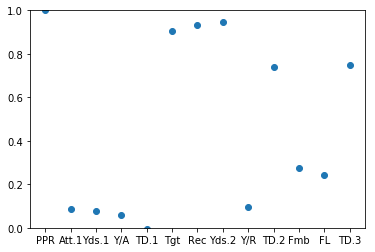

In [15]:
# Wide Receiver Correlation
wr_corr = wr[['PPR','Att.1','Yds.1','Y/A','TD.1',
              'Tgt','Rec','Yds.2','Y/R','TD.2',
              'Fmb','FL','TD.3']].corr(method='spearman', min_periods=90)

print('-----WR Correlation------')
display(wr_corr[:1])
plt.plot('PPR', data=wr_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()

In [16]:
%store wr

Stored 'wr' (DataFrame)


In [17]:
# Wide Receivers Sorted
print('--------WR Sorted---------')
wr_sorted = wr.sort_values(by=['Yds.2','Rec','Tgt','TD.3',
                               'TD.2'],na_position='last',ascending=False)
display(wr_sorted[:10])

--------WR Sorted---------


,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
274,Julio Jones,ATL,WR,26,16,16,0,0,0,0,0,0,0,0.00,0,203,136,1871,13.76,8,3,1,9,0.0,0.0,235.0,369.1,379.1,307.1,111.0,2,3.0,2015
273,Antonio Brown,PIT,WR,27,16,16,0,0,0,0,0,3,28,9.33,0,193,136,1834,13.49,10,3,2,11,2.0,0.0,250.0,388.2,393.2,320.2,126.0,1,1.0,2015
364,Antonio Brown,PIT,WR,26,16,16,2,2,20,1,0,4,13,3.25,0,181,129,1698,13.16,13,2,2,14,1.0,0.0,252.0,386.9,391.9,322.4,129.0,1,4.0,2014
4,Julio Jones,ATL,WR,29,16,16,0,0,0,0,0,2,12,6.00,0,170,113,1677,14.84,8,2,2,8,0.0,0.0,213.0,325.9,330.9,269.4,97.0,5,12.0,2018
366,Demaryius Thomas,DEN,WR,27,16,16,0,0,0,0,0,0,0,0.00,0,184,111,1619,14.59,11,0,0,11,1.0,0.0,230.0,340.9,343.9,285.4,107.0,2,9.0,2014
371,Julio Jones,ATL,WR,25,15,15,0,0,0,0,0,1,1,1.00,0,163,104,1593,15.32,6,2,1,6,0.0,0.0,193.0,297.4,301.4,245.4,70.0,8,19.0,2014
3,DeAndre Hopkins,HOU,WR,26,16,16,0,1,0,0,0,1,-7,-7.00,0,163,115,1572,13.67,11,2,2,11,0.0,0.0,219.0,333.5,338.5,276.0,102.0,4,11.0,2018
92,Antonio Brown,PIT,WR,29,14,14,0,0,0,0,0,0,0,0.00,0,163,101,1533,15.18,9,4,0,9,1.0,0.0,209.0,310.3,313.3,259.8,98.0,2,7.0,2017
5,Mike Evans,TAM,WR,25,16,16,0,0,0,0,0,0,0,0.00,0,138,86,1524,17.72,8,2,1,9,0.0,0.0,198.0,284.4,294.4,247.4,82.0,6,16.0,2018
278,DeAndre Hopkins,HOU,WR,23,16,16,0,0,0,0,0,0,0,0.00,0,192,111,1521,13.70,11,1,0,11,1.0,0.0,220.0,331.1,334.1,275.6,96.0,6,10.0,2015


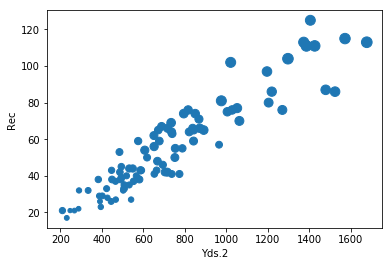

In [18]:
def plotyear(year):
    data = wr[wr.Year == year]
    area = data.Tgt * 0.67
    data.plot.scatter('Yds.2', 'Rec', s=area)
    
plotyear('2018')

In [19]:
## Tight Ends ##
#
# 
# 2018 Tight Ends
te_2018 = fantasy_stats_2018[fantasy_stats_2018['FantPos'] == 'TE']
te_2018 = te_2018[:37]
#display(te_2018[:10])

# 2017 Tight Ends
te_2017 = fantasy_stats_2017[fantasy_stats_2017['FantPos'] == 'TE']
te_2017 = pd.DataFrame(te_2017[:37])
#display(te_2017[:10])

# 2016 Tight Ends
te_2016 = fantasy_stats_2016[fantasy_stats_2016['FantPos'] == 'TE']
te_2016 = pd.DataFrame(te_2016[:37])
#display(te_2016[:10])

# 2015 Tight Ends
te_2015 = fantasy_stats_2015[fantasy_stats_2015['FantPos'] == 'TE']
te_2015 = pd.DataFrame(te_2015[:37])
#display(te_2015[:10])

# 2014 Tight Ends
te_2014 = fantasy_stats_2014[fantasy_stats_2014['FantPos'] == 'TE']
te_2014 = pd.DataFrame(te_2014[:37])
#display(te_2014[:10])

# Combine TEs
te = te_2018.merge(te_2017, how='outer', on=None)
te = te.merge(te_2016, how='outer', on=None)
te = te.merge(te_2015, how='outer', on=None)
te = te.merge(te_2014, how='outer', on=None)

# Removing special characters from player names
te = pd.DataFrame(te)
te['Player'] = te['Player'].str.strip('*+')

# Change NaN Values to 0
te = te.fillna(0)

In [20]:
%store te

Stored 'te' (DataFrame)


-----Tight End Correlation------


,PPR,Att.1,Yds.1,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3
PPR,1.0,0.269741,0.10491,0.146491,0.930313,0.945516,0.955681,0.04884,0.642559,0.299485,0.236633,0.655559


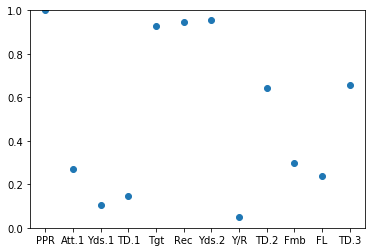

In [21]:
# Tight End Correlation
te_corr = te[['PPR','Att.1','Yds.1','TD.1','Tgt',
              'Rec','Yds.2','Y/R','TD.2','Fmb',
              'FL','TD.3']].corr(method='spearman', min_periods=36)

print('-----Tight End Correlation------')
display(te_corr[:1])
plt.plot('PPR', data=te_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()

In [22]:
# Tight Ends Sorted
print('--------Tight Ends Sorted---------')
te_sorted = te.sort_values(by=['Yds.2','Rec','Tgt','TD.3',
                               'TD.2'],na_position='last', ascending=False)
display(te_sorted[:10])

--------Tight Ends Sorted---------


,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
1,George Kittle,SFO,TE,25,16,16,0,0,0,0,0,1,10,10.0,0,136,88,1377,15.65,5,0,0,5,1.0,0.0,171.0,258.7,261.7,214.7,88.0,2,15.0,2018
0,Travis Kelce,KAN,TE,29,16,16,0,0,0,0,0,0,0,0.0,0,150,103,1336,12.97,10,2,1,10,0.0,0.0,192.0,294.6,298.6,243.1,109.0,1,8.0,2018
111,Rob Gronkowski,NWE,TE,26,15,15,0,0,0,0,0,0,0,0.0,0,120,72,1176,16.33,11,0,0,11,0.0,0.0,184.0,255.6,258.6,219.6,96.0,1,9.0,2015
2,Zach Ertz,PHI,TE,28,16,16,0,0,0,0,0,0,0,0.0,0,156,116,1163,10.03,8,1,0,8,0.0,0.0,164.0,280.3,283.3,222.3,81.0,3,17.0,2018
74,Travis Kelce,KAN,TE,27,16,15,0,0,0,0,0,1,-5,-5.0,0,117,85,1125,13.24,4,0,0,4,1.0,0.0,138.0,223.0,226.0,180.5,49.0,1,21.0,2016
148,Rob Gronkowski,NWE,TE,25,15,10,0,0,0,0,0,0,0,0.0,0,131,82,1124,13.71,12,0,0,12,0.0,0.0,184.0,266.4,269.4,225.4,94.0,1,11.0,2014
114,Greg Olsen,CAR,TE,30,16,16,0,0,0,0,0,0,0,0.0,0,124,77,1104,14.34,7,1,1,7,0.0,0.0,150.0,227.4,231.4,188.9,63.0,4,18.0,2015
115,Delanie Walker,TEN,TE,31,15,10,0,0,0,0,0,1,36,36.0,0,133,94,1088,11.57,6,0,0,6,1.0,0.0,150.0,244.4,247.4,197.4,63.0,5,19.0,2015
37,Rob Gronkowski,NWE,TE,28,14,14,0,0,0,0,0,0,0,0.0,0,105,69,1084,15.71,8,1,0,8,1.0,0.0,158.0,227.4,230.4,192.9,77.0,1,11.0,2017
75,Greg Olsen,CAR,TE,31,16,16,0,0,0,0,0,0,0,0.0,0,129,80,1073,13.41,3,0,0,3,1.0,0.0,131.0,207.3,210.3,167.3,42.0,2,26.0,2016


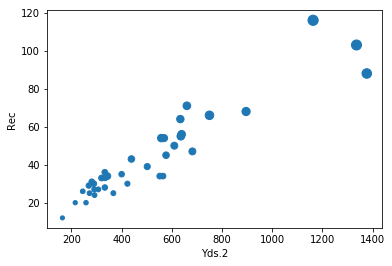

In [23]:
def plotyear(year):
    data = te[te.Year == year]
    area = data.Tgt * 0.67
    data.plot.scatter('Yds.2', 'Rec', s=area)
    
plotyear('2018')